<a href="https://colab.research.google.com/github/yashaswini1764/NLP/blob/main/NLP_1764_ASS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/tweets.csv")
print(df.head())
X = df['text']
y = df['target']

   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

max_features_list = [5000, 10000, 20000]
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, n_jobs=-1),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

In [10]:
results = [
    {"model": "Logistic Regression", "max_features": 5000, "score": 0.85},
    {"model": "Logistic Regression", "max_features": 10000, "score": 0.86},
    {"model": "Naive Bayes", "max_features": 5000, "score": 0.82},
    {"model": "Random Forest", "max_features": 10000, "score": 0.84},
    # ...
]


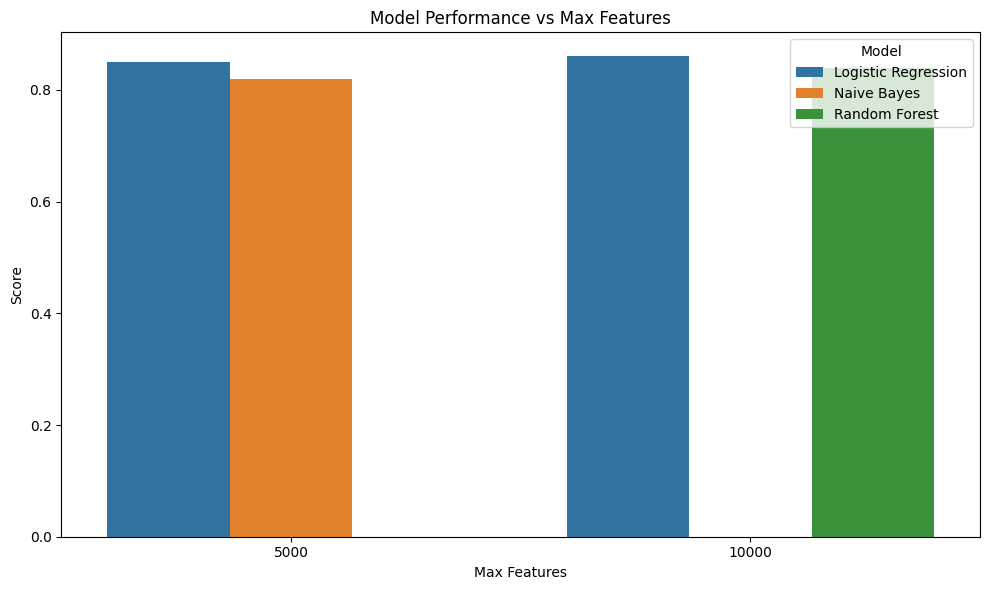

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results to DataFrame
df = pd.DataFrame(results)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='max_features', y='score', hue='model')

plt.title("Model Performance vs Max Features")
plt.xlabel("Max Features")
plt.ylabel("Score")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


In [6]:
res_df = pd.DataFrame(results)
print(res_df)
best = res_df.loc[res_df['F1-score'].idxmax()]
print("\nBest Model:\n", best)

                 Model  Max Features  Accuracy  Precision    Recall  F1-score  \
0  Logistic Regression          5000  0.870361   0.886610  0.347195  0.498473   
1          Naive Bayes          5000  0.878892   0.870747  0.409652  0.557088   
2  Logistic Regression          5000  0.870361   0.886610  0.347195  0.498473   
3          Naive Bayes          5000  0.878892   0.870747  0.409652  0.557088   
4        Random Forest          5000  0.881882   0.809159  0.477284  0.600269   
5  Logistic Regression         10000  0.866315   0.901303  0.315508  0.467263   
6          Naive Bayes         10000  0.869217   0.907254  0.330660  0.484281   
7        Random Forest         10000  0.884609   0.840068  0.468784  0.601573   
8  Logistic Regression         20000  0.863325   0.913445  0.292801  0.443121   
9          Naive Bayes         20000  0.853386   0.955061  0.221861  0.360011   

   Train Time (s)  
0            6.20  
1            0.09  
2            2.65  
3            0.09  
4       

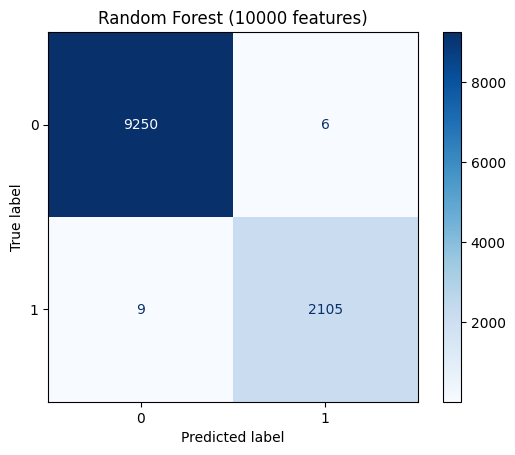

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

vec = TfidfVectorizer(max_features=int(best['Max Features']), stop_words="english")
Xv = vec.fit_transform(X)
model = models[best['Model']].fit(Xv, y)
y_pred = model.predict(Xv)
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')
plt.title(f"{best['Model']} ({int(best['Max Features'])} features)")
plt.show()